In [1]:
import numpy as np
import matplotlib.pyplot as plt

# DERIVADAS

In [2]:
A=-5
B=5
N=1001
x = np.linspace(A,B,N)
h = x[1]-x[0]

In [36]:
def f(x):
    y = np.exp(-x**2)
    return y
y = f(x)
dy = -2*x*np.exp(-x**2)
dy2= -2*np.exp(-x**2) + 4*(x**2)*np.exp(-x**2)

## Forward difference

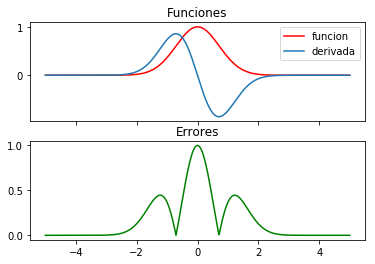

In [15]:
def derivada_f(x,h):
    derivada_f = (f(x+h)-f(x))/h
    return derivada_f
f1, ax = plt.subplots(2, sharex=True)
ax[0].plot(x,y, c = 'red', label="funcion")
ax[0].plot(x,derivada_f(x,h), label ="derivada")
ax[0].legend(loc='upper right')
ax[0].set_title('Funciones')
error =abs(derivada_f(x,h)-(dy))/h
ax[1].plot(x,error, c = 'green')
ax[1].set_title('Errores')
plt.show()

## Central difference

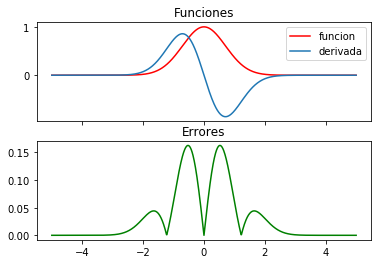

In [14]:
def derivada_c(x,h):
    derivada_c = (f(x+h/2)-f(x-h/2))/h
    return derivada_c


f1, ax = plt.subplots(2, sharex=True)
ax[0].plot(x,y, c = 'red', label ='funcion')
ax[0].plot(x,derivada_c(x,h), label = 'derivada')
ax[0].legend(loc='upper right')
ax[0].set_title('Funciones')
error =abs(derivada_c(x,h)-(dy))/(h**2)
ax[1].plot(x,error, c = 'green')
ax[1].set_title('Errores')
plt.show()

## Second derivate

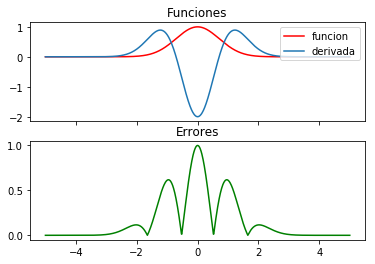

In [16]:
def derivada2(y,h):
    derivada2 = (f(x+h)+f(x-h)-(2*f(x)))/(h**2)
    return derivada2

f1, ax = plt.subplots(2, sharex=True)
ax[0].plot(x,y, c = 'red', label ='funcion')
ax[0].plot(x,derivada2(x,h), label = 'derivada')
ax[0].legend(loc='upper right')
ax[0].set_title('Funciones')
error =abs(derivada2(x,h)-(dy2))/h**2
ax[1].plot(x,error, c = 'green')
ax[1].set_title('Errores')
plt.show()

## Extrapolated

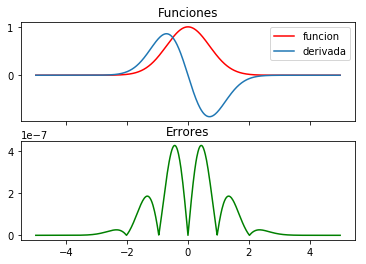

In [17]:
def derivada_e(x,h):
    derivada_e = (4*derivada_c(x,h/2)-derivada_c(x,h))/3
    return derivada_e
f1, ax = plt.subplots(2, sharex=True)
ax[0].plot(x,y, c = 'red', label ='funcion')
ax[0].plot(x,derivada_e(x,h), label = 'derivada')
ax[0].legend(loc='upper right')
ax[0].set_title('Funciones')
error =abs(derivada_e(x,h)-(dy))/h**2
ax[1].plot(x,error, c = 'green')
ax[1].set_title('Errores')
plt.show()

# COMAPARACIÓN ERRORES

In [18]:
def prom_integral(y,B,A,N):
    ancho = 1/(N-1)
    odd = np.sum(y[1:-1:2])*4/3
    pair = np.sum(y[2:-1:2])*2/3
    h = (y[0]+y[-1])/3 + odd + pair
    return(h*ancho)

In [44]:
h_s = np.logspace(-9,0,1001)
err_f = []
err_c = []
err_e = []
for H in h_s:
    #Forward
    f_f = abs(derivada_f(x,H) - dy)
    err_f.append(prom_integral(f_f,B,A,N))
    #Center
    f_c = abs(derivada_c(x,H) - dy)
    err_c.append(prom_integral(f_c,B,A,N))
    #Extrapolated
    f_e = abs(derivada_e(x,H) - dy)
    err_e.append(prom_integral(f_e,B,A,N))  

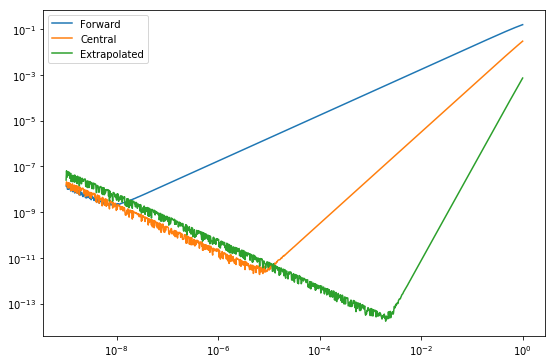

In [45]:
fig = plt.figure(figsize =(9,6))
plt.plot(h_s,err_f, label='Forward')
plt.plot(h_s,err_c, label = 'Central')
plt.plot(h_s,err_e, label='Extrapolated')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left')
plt.show()

/Users/Prueba/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/Prueba/anaconda3/lib/python3.6/site-packages/mpl_toolkits/mplot3d/proj3d.py:160: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


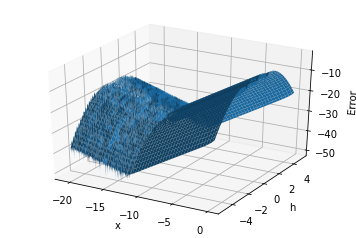

In [49]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

X, H = np.meshgrid(x, h_s)
def error(x,h):
    return abs(derivada_c(x,h)-dy)
Z = error(X,H)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(np.log(H), X, np.log(Z))
ax.set_xlabel("x")
ax.set_ylabel("h")
ax.set_zlabel("Error")
plt.show()